# Q1

In [448]:
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Loading Dataset
train_data = np.loadtxt('TinyMNIST/trainData.csv', dtype=np.float32, delimiter=',')
train_labels = np.loadtxt('TinyMNIST/trainLabels.csv', dtype=np.int32, delimiter=',')
test_data = np.loadtxt('TinyMNIST/testData.csv', dtype=np.float32, delimiter=',')
test_labels = np.loadtxt('TinyMNIST/testLabels.csv', dtype=np.int32, delimiter=',')
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
# Feature Selection
tr_samples_size, _ = train_data.shape
all_data = np.vstack((train_data,test_data))
sel = VarianceThreshold(threshold=0.90*(1-0.90))
all_data = sel.fit_transform(all_data)
train_data = all_data[:tr_samples_size]
test_data = all_data[tr_samples_size:]

tr_samples_size, feature_size = train_data.shape
te_samples_size, _ = test_data.shape
print('Train Data Samples:',tr_samples_size,
      ', Test Data Samples',te_samples_size,
      ', Feature Size(after feature-selection):', feature_size)

Train Data Samples: 5000 , Test Data Samples 2500 , Feature Size(after feature-selection): 62


In [449]:
import pandas as pd
df_train_data = pd.DataFrame(train_data)
df_train_labels = pd.DataFrame(train_labels)
df_test_data = pd.DataFrame(test_data)
df_test_labels = pd.DataFrame(test_labels)

In [450]:
df_train_data

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,0.000000,0.000000,0.000000,0.095098,0.169608,0.175490,0.000000,0.000000,0.000000,0.958824,...,0.000000,0.000000,0.000000,0.218627,0.980392,0.000000,0.000000,0.000000,0.000000,0.937255
1,0.030392,0.378431,0.497059,0.390196,0.864706,0.962745,0.893137,0.934314,0.228431,0.040196,...,0.030392,0.259804,0.746078,0.882353,0.108824,0.943137,0.924510,0.982353,0.774510,0.147059
2,0.000000,0.000000,0.000000,0.605882,0.919608,0.319608,0.000000,0.000000,0.022549,0.400980,...,0.000000,0.000000,0.777451,0.527451,0.000000,0.000000,0.000000,0.000000,0.935294,0.369608
3,0.024510,0.558824,0.936275,0.000000,0.532353,0.895098,0.150000,0.000000,0.000000,0.000000,...,0.949020,0.758824,0.516667,0.235294,0.000000,0.000000,0.332353,0.002941,0.000000,0.000000
4,0.000000,0.762745,0.134314,0.000000,0.000000,0.680392,0.350000,0.000000,0.000000,0.000000,...,0.424510,0.930392,0.071569,0.000000,0.000000,0.000000,0.596079,0.543137,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.068627,0.368627,0.496078,0.000000,0.589216,0.990196,0.988235,0.988235,0.988235,0.000000,...,0.080392,0.230392,0.865686,0.647059,0.000000,0.979412,0.988235,0.988235,0.907843,0.318627
4996,0.180392,0.329412,0.282353,0.712745,0.563726,0.366667,0.367647,0.493137,0.626471,0.024510,...,0.629412,0.000980,0.000000,0.002941,0.558824,0.000000,0.615686,0.442157,0.462745,0.780392
4997,0.000000,0.000000,0.455882,0.000000,0.000000,0.311765,0.951961,0.701961,0.006863,0.000000,...,0.992157,0.992157,0.954902,0.334314,0.000000,0.047059,0.480392,0.394118,0.090196,0.000000
4998,0.000000,0.000000,0.000000,0.013725,0.546078,0.800980,0.891177,0.224510,0.000000,0.046078,...,0.000000,0.000000,0.516667,0.534314,0.000000,0.000000,0.000000,0.000000,0.611765,0.533333


In [457]:
#forward_selection
features = []
ccr = []
clf = GaussianNB()
for i in range(0,feature_size):
    best_score = 0
    for j in range(0,feature_size):
        if j not in features:
            clf.fit(df_train_data[features+[j]], train_labels)
            y_pred = clf.predict(df_test_data[features+[j]])
            score = accuracy_score(test_labels, y_pred)*100
            if(score>best_score):
                best_score = score
                feature = j
    features.append(feature)
    ccr.append(best_score)   

num  42
ccr 79.36


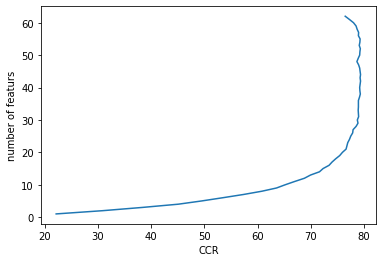

In [458]:
x = [i for i in range(1,feature_size+1)]
plt.plot(ccr,x)
plt.ylabel('number of featurs')
plt.xlabel('CCR')
print("num ",ccr.index(max(ccr))+1)
print("ccr",max(ccr))

In [459]:
#backward_elimination
features = [i for i in range(0,feature_size)]
ccr = []
clf = GaussianNB()
clf.fit(df_train_data[features], train_labels)
y_pred = clf.predict(df_test_data[features])
score = accuracy_score(test_labels, y_pred)*100
ccr.append(score)
for i in range(0,feature_size-1):
    best_score = 0
    for j in range(0,feature_size):
        if j in features:
            idx = features.index(j)
            clf.fit(df_train_data[features[:idx]+features[idx+1:]], train_labels)
            y_pred = clf.predict(df_test_data[features[:idx]+features[idx+1:]])
            score = accuracy_score(test_labels, y_pred)*100
            if(score>best_score):
                best_score = score
                feature = j
    features.remove(feature)
    ccr.append(best_score) 

num  39
ccr 79.88


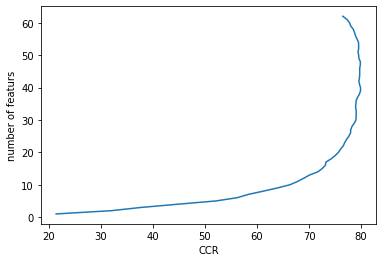

In [460]:
x = [i for i in range(1,feature_size+1)]
ccr.reverse()
plt.plot(ccr,x)
plt.ylabel('number of featurs')
plt.xlabel('CCR')
print("num ",ccr.index(max(ccr))+1)
print("ccr",max(ccr))

## Q2

Text(0.5, 1.0, 'Explained variation per principal component')

<Figure size 432x288 with 0 Axes>

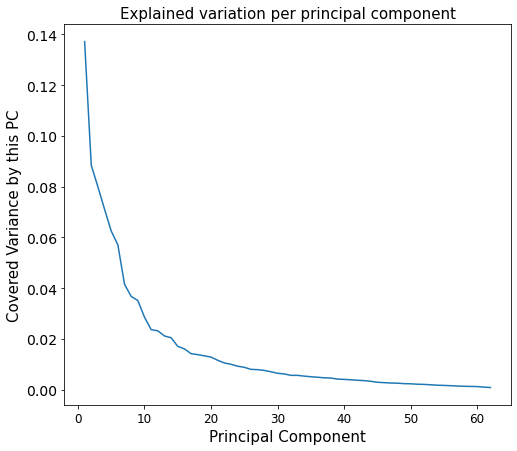

In [85]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca_mnist = PCA(n_components = feature_size)
principalComponents_mnist = pca_mnist.fit_transform(df_train_data)

xs = np.array(range(1,feature_size+1))
plt.figure()
plt.figure(figsize=(8,7))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.plot(xs,pca_mnist.explained_variance_ratio_)
plt.xlabel('Principal Component',fontsize=15)
plt.ylabel('Covered Variance by this PC',fontsize=15)
plt.title("Explained variation per principal component",fontsize=15)

In [87]:
optimal_component = 25
pca_mnist = PCA(n_components = optimal_component)

transformed_train = pca_mnist.fit_transform(df_train_data)
transformed_test = pca_mnist.transform(df_test_data)

clf = GaussianNB()
clf.fit(transformed_train, train_labels)
y_pred = clf.predict(transformed_test)
CCR = accuracy_score(test_labels, y_pred)*100
print(CCR)

79.12


## Q8

In [442]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, :2] 
Y = iris.target

Text(0, 0.5, 'Sepal width')

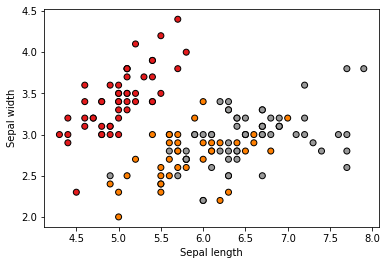

In [443]:
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

## a

In [372]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=40)

In [373]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
from sklearn import svm
from sklearn.pipeline import Pipeline
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [374]:
# check wether the dataset is balanced or not
np.unique(y_train, return_counts = True)

(array([0, 1, 2]), array([42, 38, 40]))

In [439]:
def evaluate_models(models,titles):
    for model,title in zip(models, titles):
        print(title+":")
        y_pred = model.predict(x_test)
        confusion_mtx = confusion_matrix(y_test, y_pred)
        print('classification report:')
        print(classification_report(y_test, y_pred))
        print('confusion matrix:')
        print(confusion_mtx)
        print("\n")

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contour(clf,title):
    X0, X1 = x_train[:, 0], x_train[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z)
    plt.scatter(X0, X1, c=y_train, s=20, edgecolors='k')
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.title(title)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

def plot_models(models,titles):
    for model,title in zip(models, titles):
        plot_contour(model,title) 
        

In [440]:
models= [svm.SVC(kernel='linear'),
         svm.SVC(kernel='rbf'),
         svm.SVC(kernel='poly')]
models = [clf.fit(x_train, y_train) for clf in models]

titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

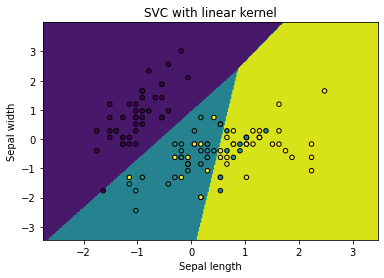

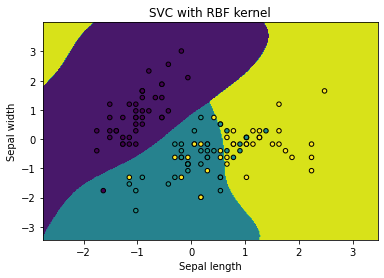

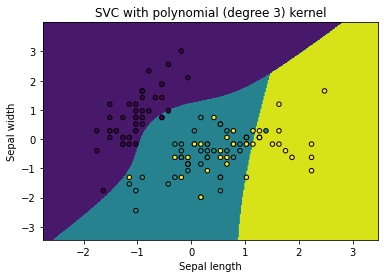

In [441]:
plot_models(models,titles)

In [378]:
evaluate_models(models,titles)

SVC with linear kernel:
classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.83      0.83      0.83        12
           2       0.80      0.80      0.80        10

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30

confusion matrix:
[[ 8  0  0]
 [ 0 10  2]
 [ 0  2  8]]


SVC with RBF kernel:
classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.85      0.92      0.88        12
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30

confusion matrix:
[[ 8  0  0]
 [ 0 11  1]
 [ 0  2  8]]


SVC with polynomial (degree 3) ke

## b

In [379]:
models= [svm.SVC(C=0.1),
         svm.SVC(C=10),
         svm.SVC(C=100),
         svm.SVC(gamma=10),
         svm.SVC(gamma=0.1),
         svm.SVC(gamma=0.01),
        ]
models = [clf.fit(x_train, y_train) for clf in models]

titles = ['SVC,C=0.1',
          'SVC,C=10',
          'SVC,C=100',
          'SVC,gamma=10',
          'SVC,gamma=0.1',
          'SVC,gamma=0.01',
         ]

In [380]:
evaluate_models(models,titles)

SVC,C=0.1:
classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.83      0.91        12
           2       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30

confusion matrix:
[[ 8  0  0]
 [ 0 10  2]
 [ 0  0 10]]


SVC,C=10:
classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.85      0.92      0.88        12
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30

confusion matrix:
[[ 8  0  0]
 [ 0 11  1]
 [ 0  2  8]]


SVC,C=100:
classification report:
              precision

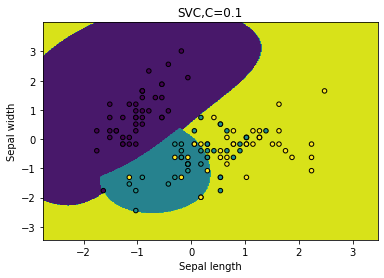

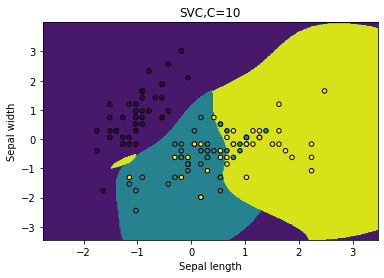

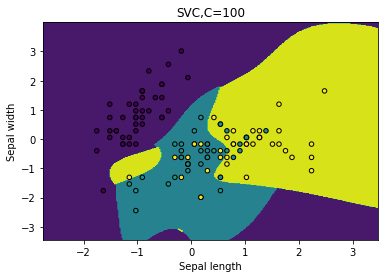

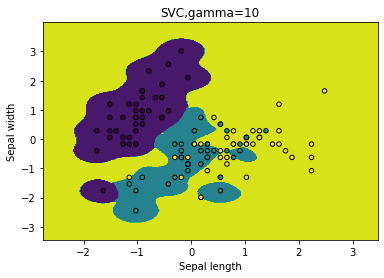

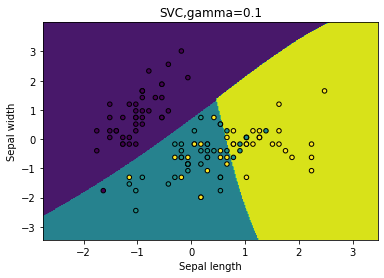

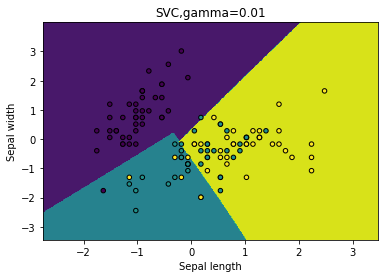

In [381]:
plot_models(models,titles)

## c

In [398]:
from sklearn.model_selection import GridSearchCV

parameteres = {'kernel':['linear','rbf','poly'],'C':[0.5,1,10], 'gamma':[0.5,1,10]}
grid = GridSearchCV(svm.SVC(), param_grid=parameteres)
grid.fit(x_train, y_train)

print ('accuracy of the model is:',grid.score(x_test,y_test))
print ('best parameters of the model are:',grid.best_params_)

accuracy of the model is: 0.8666666666666667
best parameters of the model are: {'C': 0.5, 'gamma': 0.5, 'kernel': 'linear'}


In [399]:
models= [svm.SVC(kernel='linear',gamma=0.5,C=0.5),
         svm.SVC(kernel='rbf',gamma=0.5,C=0.5),
         svm.SVC(kernel='poly',gamma=0.5,C=0.5)
        ]
models = [clf.fit(x_train, y_train) for clf in models]

titles = ['kernel=linear , C=0.5 , gamma=0.5',
          'kernel=rbf , C=0.5 , gamma=0.5',
          'kernel=poly , C=0.5 , gamma=0.5'
         ]

In [400]:
evaluate_models(models,titles)

kernel=linear , C=0.5 , gamma=0.5:
classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.79      0.92      0.85        12
           2       0.88      0.70      0.78        10

    accuracy                           0.87        30
   macro avg       0.89      0.87      0.87        30
weighted avg       0.87      0.87      0.86        30

confusion matrix:
[[ 8  0  0]
 [ 0 11  1]
 [ 0  3  7]]


kernel=rbf , C=0.5 , gamma=0.5:
classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.79      0.92      0.85        12
           2       0.88      0.70      0.78        10

    accuracy                           0.87        30
   macro avg       0.89      0.87      0.87        30
weighted avg       0.87      0.87      0.86        30

confusion matrix:
[[ 8  0  0]
 [ 0 11  1]
 [ 0  3  7]]


kernel=poly

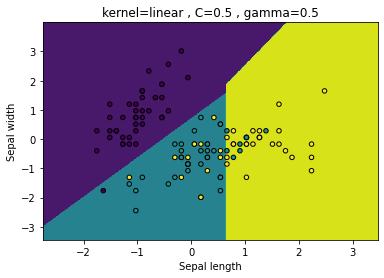

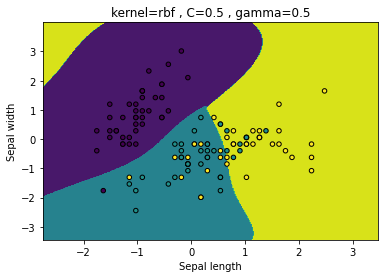

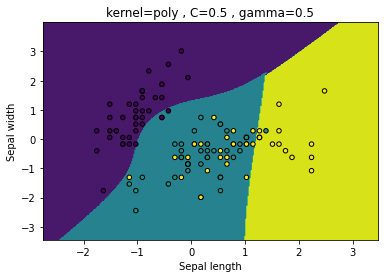

In [401]:
plot_models(models,titles)

## d

In [444]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
models= [OneVsOneClassifier(svm.SVC(kernel='linear')),
         OneVsOneClassifier(svm.SVC(kernel='rbf')),
         OneVsOneClassifier(svm.SVC(kernel='poly',degree=3))
        ]
models = [clf.fit(x_train, y_train) for clf in models]

titles = ['OneVsOneClassifier kernel=linear',
          'OneVsOneClassifier kernel=rbf',
          'OneVsOneClassifier kernel=poly'
         ]

In [407]:
evaluate_models(models,titles)

OneVsOneClassifier kernel=linear:
classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.83      0.83      0.83        12
           2       0.80      0.80      0.80        10

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30

confusion matrix:
[[ 8  0  0]
 [ 0 10  2]
 [ 0  2  8]]


OneVsOneClassifier kernel=rbf:
classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.85      0.92      0.88        12
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30

confusion matrix:
[[ 8  0  0]
 [ 0 11  1]
 [ 0  2  8]]


OneVsOneClass

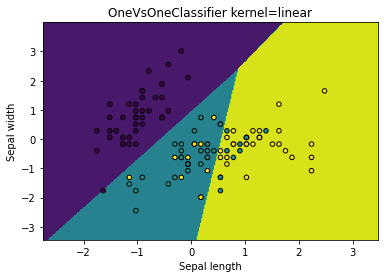

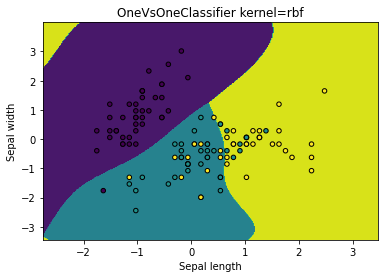

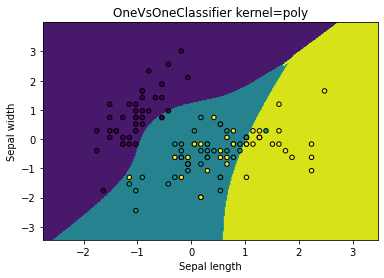

In [445]:
plot_models(models,titles)

In [409]:
models= [OneVsRestClassifier(svm.SVC(kernel='linear')),
         OneVsRestClassifier(svm.SVC(kernel='rbf')),
         OneVsRestClassifier(svm.SVC(kernel='poly',degree=3))
        ]
models = [clf.fit(x_train, y_train) for clf in models]

titles = ['OneVsRestClassifier kernel=linear',
          'OneVsRestClassifier kernel=rbf',
          'OneVsRestClassifier kernel=poly'
         ]

In [410]:
evaluate_models(models,titles)

OneVsRestClassifier kernel=linear:
classification report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.83      0.91        12
           2       0.91      1.00      0.95        10

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.94      0.93      0.93        30

confusion matrix:
[[ 8  0  0]
 [ 1 10  1]
 [ 0  0 10]]


OneVsRestClassifier kernel=rbf:
classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.79      0.92      0.85        12
           2       0.88      0.70      0.78        10

    accuracy                           0.87        30
   macro avg       0.89      0.87      0.87        30
weighted avg       0.87      0.87      0.86        30

confusion matrix:
[[ 8  0  0]
 [ 0 11  1]
 [ 0  3  7]]


OneVsRestCl

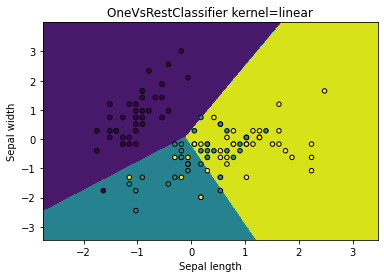

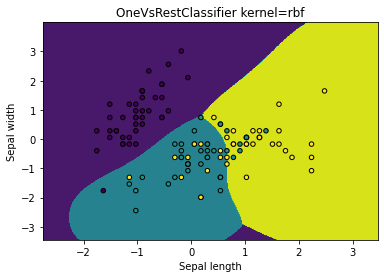

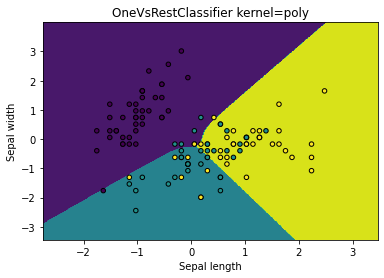

In [411]:
plot_models(models,titles)